Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
55000 10000 5000
(55000, 784) (55000, 10)
0.0 1.0


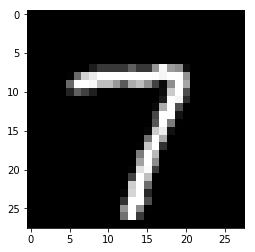

In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt

# read the data and labels as ont-hot vectors
# one-hot means a sparse vector for every observation where only
# the class label is 1, and every other class is 0.
# more info here:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

%matplotlib inline
# mnist is now a DataSet with accessors for:
#'train', 'test', and 'validation'.
# within each, we can access:
# images, labels, and num_examples
print(mnist.train.num_examples,
      mnist.test.num_examples,
      mnist.validation.num_examples)

# the images are stored as:
# n_observations x n_features tensor (n-dim array)
# the labels are stored as n_observations x n_labels,
# where each observation is a one-hot vector.
print(mnist.train.images.shape, mnist.train.labels.shape)

# the range of the values of the images is from 0-1
print(np.min(mnist.train.images), np.max(mnist.train.images))

# we can visualize any one of the images by reshaping it to a 28x28 image
plt.imshow(np.reshape(mnist.train.images[100, :], (28, 28)), cmap='gray')

In [2]:
n_input = 784
n_output = 10
n_hidden1 = 256
n_hidden2 = 256
n_hidden3 = 128

net_input = tf.placeholder(tf.float32, [None, n_input], name="net_input")
y_true = tf.placeholder(tf.float32, [None, n_output])
keep_prob = tf.placeholder(tf.float32, name="keep_prob")

# Store layers weight & bias
weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1])),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2])),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3])),
    'out': tf.Variable(tf.truncated_normal([n_hidden1, n_output]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden3])),
    'out': tf.Variable(tf.truncated_normal([n_output]))
}

# Build layers
layer_1 = tf.nn.sigmoid(tf.matmul(net_input, weights['w1']) + biases['b1'])
layer_1 = tf.nn.dropout(layer_1, keep_prob)
layer_2 = tf.nn.sigmoid(tf.matmul(layer_1, weights['w2']) + biases['b2'])
layer_2 = tf.nn.dropout(layer_2, keep_prob)
layer_3 = tf.nn.sigmoid(tf.matmul(layer_2, weights['w3']) + biases['b3'])
layer_3 = tf.nn.dropout(layer_3, keep_prob)
out_layer = tf.nn.sigmoid(tf.matmul(layer_1, weights['out']) + biases['out'])
 
net_output = tf.identity(out_layer, name="net_output")

# prediction and actual using the argmax as the predicted label
# מחזיר בעבור כל אובייקט בבאטצ' האם התוצאה שחזינו הייתה התוצאה של המנחה
correct_prediction = tf.equal(tf.argmax(net_output, 1), tf.argmax(y_true, 1))

# And now we can look at the mean of our network's correct guesses
# מחזיר ממוצע של כל התוצאות - כלומר הדיוק שלנו. בוקטור יהיה 1 עבור חיזוי נכון ו 0 עבור חיזוי לא נכון
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# cross_entropy = -tf.reduce_sum(y_true * tf.log(net_output))
# פונקציית חישוב אנטרופיה יותר יציבה
cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=net_output, labels=y_true))

eta = 0.001
optimizer = tf.train.AdamOptimizer(eta).minimize(cost)

saver = tf.train.Saver()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Epoch 1 - train accuracy: 0.8179636597633362, validation accuracy: 0.8281999826431274
Epoch 1 - train loss: 1.642959090909091, validation loss: 1.63943359375
Epoch 2 - train accuracy: 0.8687818050384521, validation accuracy: 0.8790000081062317
Epoch 2 - train loss: 1.5957869318181819, validation loss: 1.59067451171875
Epoch 3 - train accuracy: 0.8913454413414001, validation accuracy: 0.8981999754905701
Epoch 3 - train loss: 1.5710526988636364, validation loss: 1.56575517578125
Epoch 4 - train accuracy: 0.9039090871810913, validation accuracy: 0.9100000262260437
Epoch 4 - train loss: 1.5558289772727272, validation loss: 1.55001796875
Epoch 5 - train accuracy: 0.9132182002067566, validation accuracy: 0.9197999835014343
Epoch 5 - train loss: 1.5447721590909091, validation loss: 1.54045546875
Epoch 6 - train accuracy: 0.919981837272644, validation accuracy: 0.9228000044822693
Epoch 6 - train loss: 1.5376116477272728, validation loss: 1.53388046875
Epoch 7 - train accuracy: 0.92552727460861

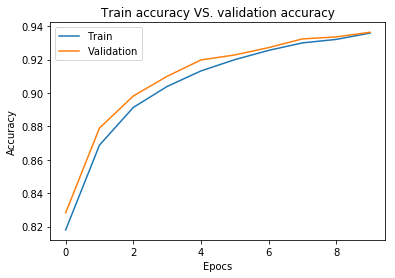

In [3]:
batch_size = 60
n_epochs = 10
l_valid_accuracy = list()
l_train_accuracy = list()
l_train_loss = list()
l_valid_loss = list()

for epoch_i in range(n_epochs):
    for batch_i in range(0, mnist.train.num_examples, batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # למעשה מריץ מאחורה את כל המודל שהגדרנו ואם צריך עושה גם עדכון לאחור לכלל המשקלים
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys,
            keep_prob: 0.5
        })
        
    train_accuracy = sess.run(accuracy, feed_dict={
                       net_input: mnist.train.images,
                       y_true: mnist.train.labels,
                       keep_prob: 1.0})
    
    train_loss = sess.run(cost, feed_dict={
                       net_input: mnist.train.images,
                       y_true: mnist.train.labels,
                       keep_prob: 1.0})    
    train_loss = train_loss / mnist.train.num_examples
    
    valid_accuracy = sess.run(accuracy, feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels,
                       keep_prob: 1.0})
    
    valid_loss = sess.run(cost, feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels,
                       keep_prob: 1.0})
    valid_loss = valid_loss / mnist.validation.num_examples    
    
    print('Epoch {} - train accuracy: {}, validation accuracy: {}'.format(epoch_i + 1,train_accuracy ,valid_accuracy))
    print('Epoch {} - train loss: {}, validation loss: {}'.format(epoch_i + 1,train_loss ,valid_loss))
    
    l_train_accuracy.append(train_accuracy)   
    l_valid_accuracy.append(valid_accuracy)       
    l_train_loss.append(train_loss)
    l_valid_loss.append(valid_loss)
    
plt.plot(l_train_accuracy)
plt.plot(l_valid_accuracy)
plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Train accuracy VS. validation accuracy')
plt.legend(['Train', 'Validation'])

print("Accuracy for test set: {}". format(sess.run(accuracy,
               feed_dict={
                   net_input: mnist.test.images,
                   y_true: mnist.test.labels,
                   keep_prob: 1.0
               })))

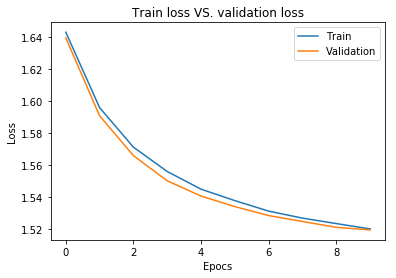

In [4]:
plt.plot(l_train_loss)
plt.plot(l_valid_loss)
plt.xlabel('Epocs')
plt.ylabel('Loss')
plt.title('Train loss VS. validation loss')
plt.legend(['Train', 'Validation'])

In [5]:
save_path = saver.save(sess, "./mnist_model")